In [1]:
#Importar les llibreries de Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

#Iniciar sessió a la conta d'IBM
service = QiskitRuntimeService()

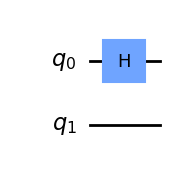

In [2]:
#Crear un circuit de 2 qbits. Aquest tindrà el nom de ex a partir d'ara. És a dir que, cada cop que nosaltres
#posem ex en el codi, aquest ho interpretarà com a un QuantumCircuit(2). D'aquesta manera estalviem escriure
#massa i fem que el nostre codi sigui més senzill d'entendre.
ex = QuantumCircuit(2)
#Hem de tenir en compte que els qbits comencen per el 0. Tenim 2 qbits, el 0 i el 1.

#Afegim una porta Hadamard al primer qbit. Posem a quin circuit volem aplicar la porta, quina porta i a quin qbit.
ex.h(0)

#Ara demanem que ens faci un retorn dels resultats en forma de dibuix.
#Utilitzem el mpl per tal d'obtenir una representació gràfica, si no ens
#hauria de fer el dibuix utilitzant caràcters de text.
ex.draw ("mpl")


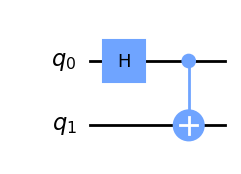

In [3]:
#Ara crearem el circuit que utilitzarem, l'anomenarem qc i serà de 2 qbits.
qc = QuantumCircuit (2)

#Primer utilitzarem una porta Hadamard al nostre primer qbit.
#Després aplicarem una porta CNOT als qbits (0,1), sent el primer el de control
#i el segon el que cambiarà de valor si es donen les condicions. 
qc.h(0)
qc.cx (0,1)

qc.draw ("mpl")

In [4]:
#Importem Pauli ja que l'utilitzarem a continuació
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

In [5]:
#Hem pogut comprovar la forma del nostre circuit i, utilitzant el compositor d'IBM sabem 
#que tenim un 50% de probabilitats d'obtenir els següents resultats: 000, 001.

#Ara posarem una configuració amb un nivell de resilència i d'optimització
#per asegurar una mínima fiabilitat dels resultats
options = Options()
options.resilience_level = 1
options.optimization_level = 3

#La següent linea farà que, cada cop que posem backend, el programa ens busqui el ordinador quàntic o simulador
#amb major disponibilitat, dintre dels que ens ofereix IBM. La que hi ha just després la utilitzariem en cas de
#voler buscar unicament un sistema en concret en comptes de buscar el que té major disponibilitat. En aquest
#cas el nom és d'un simulador. Es possible que la cua per a un ordinador sigui massa llarga i ens convingui
#més utilitzar un simulador ja que acostumen a utilitzar-se menys i tenir total disponibilitat.
backend = service.least_busy(simulator=True, operational=True)
#backend = service.get_backend("ibmq_qasm_simulator")

estimator = Estimator(backend, options=options)

job = estimator.run(circuits=[qc]*6, observables= [IZ, IX, ZI, XI, ZZ, XX], shots = 1000)

job.result ()

base_primitive._run_primitive:INFO:2023-12-01 10:03:48,032: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 1000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


EstimatorResult(values=array([ 0.01388889, -0.02380952,  0.        , -0.00396825,  1.        ,
        1.        ]), metadata=[{'variance': 0.9998070987654321, 'shots': 1008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9994331065759637, 'shots': 1008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 1.0, 'shots': 1008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9999842529604435, 'shots': 1008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.0, 'shots': 1008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_ca

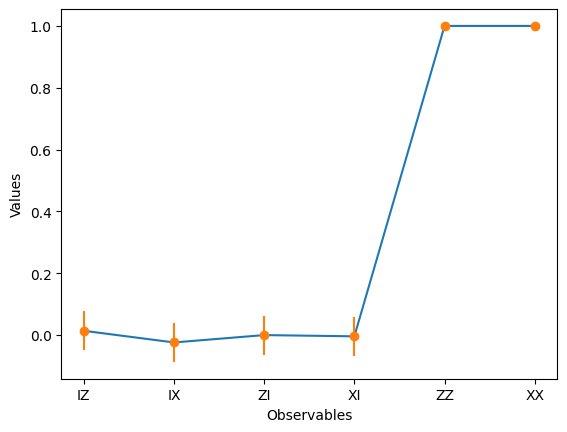

In [6]:
#Finalment importem l'últim que necessitarem per tal de crear un gràfic on podrem veure els
#resultats obtinguts per l'ordinador quàntic. Com que hem utilitzat un estimator, els resultats obtinguts
#es tracten d'una estimació dels resultats que s'esperen obtenir per al nostre circuit i observables.
import matplotlib.pyplot as plt
import numpy as np
 

data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values


error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()